### Librerias

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles 

### Clase neurona

In [22]:
class layer():
    def __init__(self, n_con, neurals, act_fun):
        self.w = np.random.rand(n_con, neurals) * 2 - 1
        self.b = np.random.rand(1, neurals) * 2 - 1
        self.neurals = neurals
        self.act_fun = act_fun

### Función de creacion de la estructura de la red neuronal

In [23]:
def create_network_neural(cant):

    neural_struc = []

    for i in range(cant):
        
        if i == 0:
            neural_struc.append(layer(p, 64, relu_act)) 
        if i == 1:
            neural_struc.append(layer(neural_struc[i-1].neurals, 2, sig_act)) 
        if i == 2:
            neural_struc.append(layer(neural_struc[i-1].neurals, 1, sig_act))                   
        if i == 3:
            neural_struc.append(layer(neural_struc[i-1].neurals, 1, sig_act))                        
                               
    return neural_struc

### Entrenamiento

In [24]:
def train(neural_net, x, y, loss_f, lr = 0.001, train=True):

    # Forward pass
    output = [(None, x)]

    for i, layer in enumerate(neural_net):
        z = output[-1][1] @ neural_net[i].w + neural_net[i].b
        a = neural_net[i].act_fun[0](z)
        output.append((z, a))
    
    if train == True:

        # Backward
        deltas = []

        for i in reversed(range(0, len(neural_net))):
            z = output[i+1][0]
            a = output[i+1][1]

            if i == len(neural_net) - 1:
                deltas.insert(0, loss_f[1](a, y) * neural_net[i].act_fun[1](a)) 
            else:
                deltas.insert(0, deltas[0] @ _w.T * neural_net[i].act_fun[1](a)) 

            _w = neural_net[i].w
            
        # Gradient descent
        neural_net[i].b = neural_net[i].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
        neural_net[i].w = neural_net[i].w - output[i][1].T @ deltas[0] * lr 
      
    return output[-1][1]

### Funciones de metricas

In [25]:
def accuracy(y_true, y_pred):

    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

def precision(y_true, y_pred):

    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    precision = true_positives / (true_positives + false_positives)
    return precision

def recall(y_true, y_pred):

    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    recall = true_positives / (true_positives + false_negatives)
    return recall

def specificity(y_true, y_pred):

    true_negatives = np.sum((y_true == 0) & (y_pred == 0))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    specificity = true_negatives / (true_negatives + false_positives)
    return specificity

def confusion_matrix(y_true, y_pred):

    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    true_negatives = np.sum((y_true == 0) & (y_pred == 0))
    
    confusion_matrix = np.array([[true_negatives, false_positives],
                                 [false_negatives, true_positives]])
    
    return confusion_matrix

### Funciones de activacion

In [26]:
# Activation functions

sig_act = (lambda x: 1 / (1 + np.e**(-x)),
            lambda x:  np.e**(-x)/((np.e**(-x) + 1)**2))

relu_act = (lambda x: np.maximum(0, x),
            lambda x: np.where(x > 0, 1, 0))

tan_act = (lambda x: np.tanh(x),
           lambda x: 1 - np.tanh(x)**2)

seno_act = (lambda x: np.sin(x),
            lambda x: np.cos(x))

senop_act = (lambda x: -np.sin(x),
            lambda x: -np.cos(x))

### Funcion de perdida

In [27]:
loss_f = (lambda yp, yr: -np.mean(yr * np.log(yp) + (1 - yr) * np.log(1 - yp)),
          lambda yp, yr: yp - yr)

### Inicializacion de las variables

In [28]:
np.random.seed(42)
n = 500  # Number of data points
p = 2      # Number of inputs for the first layer
x, y = make_circles(n_samples=n, factor=0.5, noise=0.05)
y = y[:, np.newaxis]

# Test set percentage
test_percentage = 0.2

# Number of data points for the test set
num_test = int(n * test_percentage)

# Indices for the test set
test_indices = np.random.choice(n, num_test, replace=False)

# Indices for the training set
train_indices = np.setdiff1d(np.arange(n), test_indices)

# Test sets
x_test, y_test = x[test_indices], y[test_indices]

# Training sets
x_train, y_train = x[train_indices], y[train_indices]

### Entrenando a la red

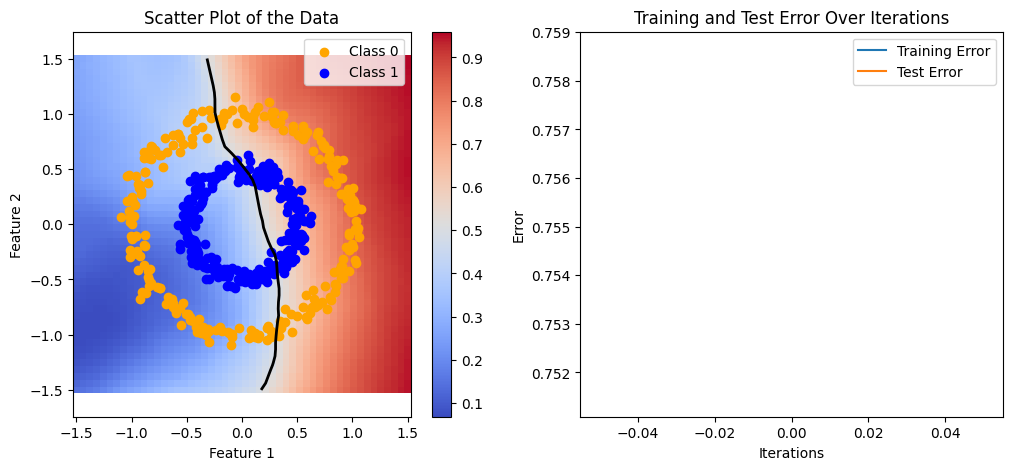

0.7586511835985086 0.7514491579491337


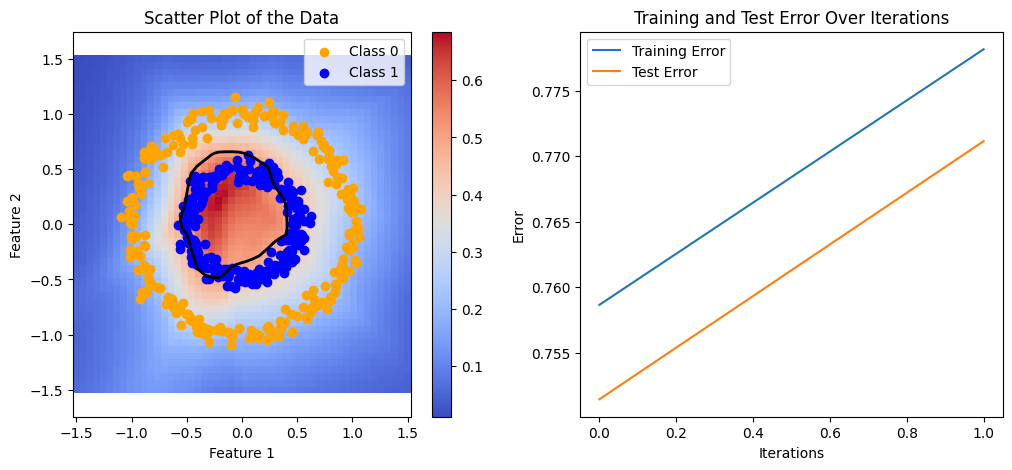

0.7781574132433314 0.7711423788521398


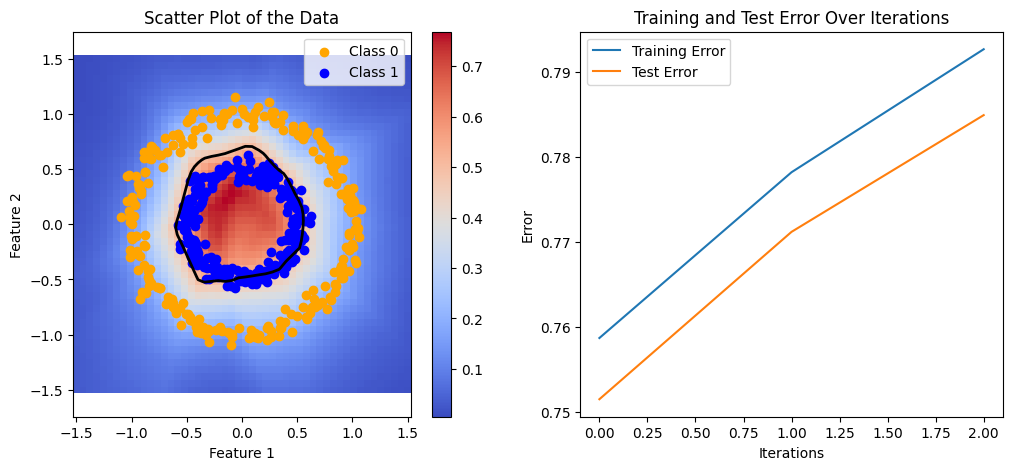

0.7926307162052949 0.7848772438524722


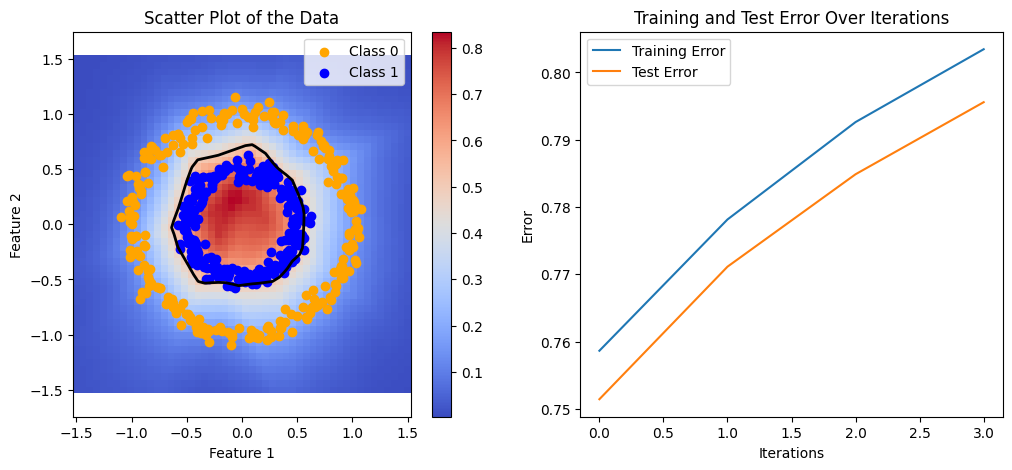

0.8034512662082033 0.7955836353805614


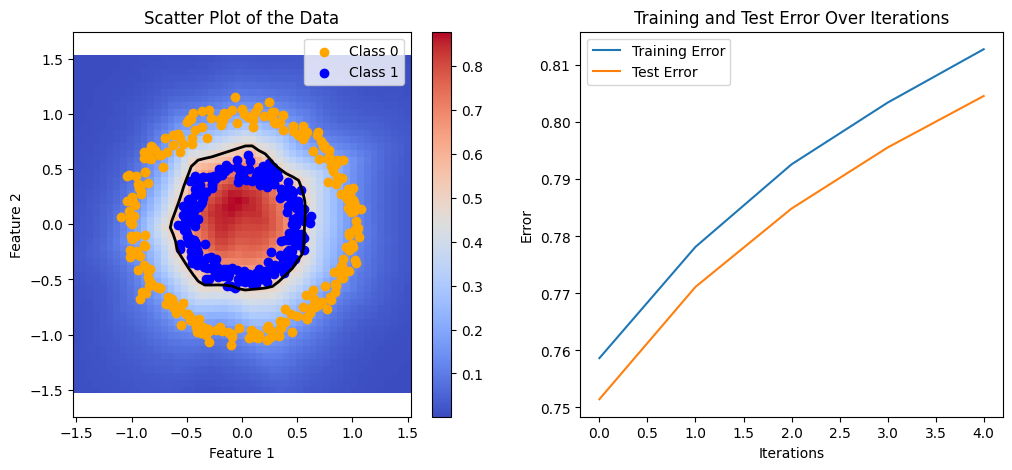

0.8128175327431193 0.804615976988516


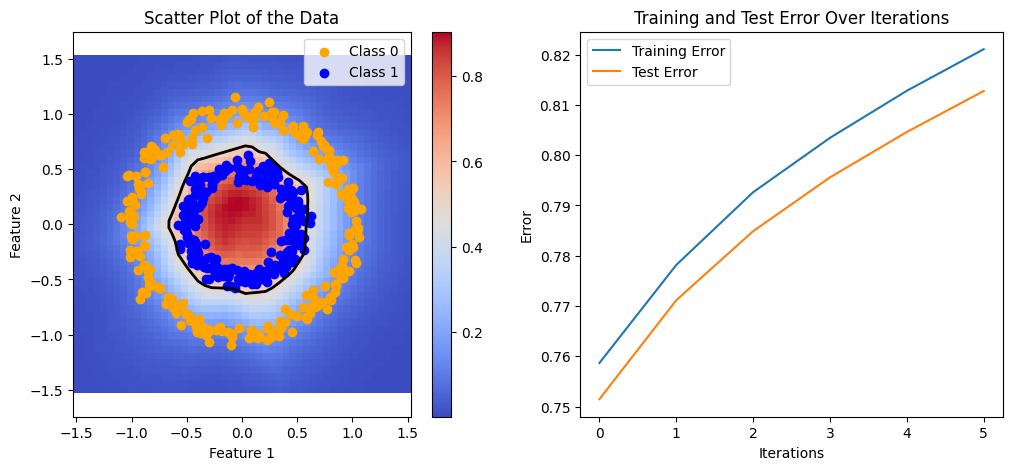

0.8210837842725779 0.8127682744679038


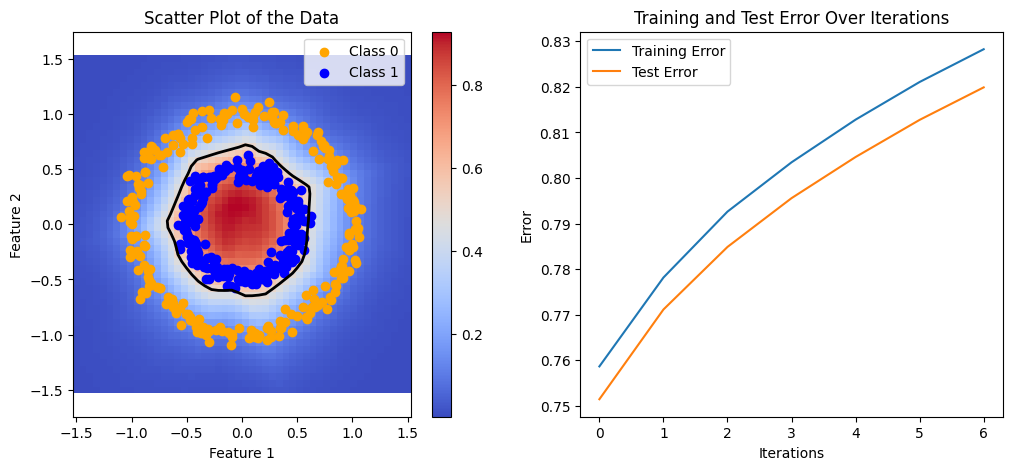

0.828274554391177 0.8199001210694986


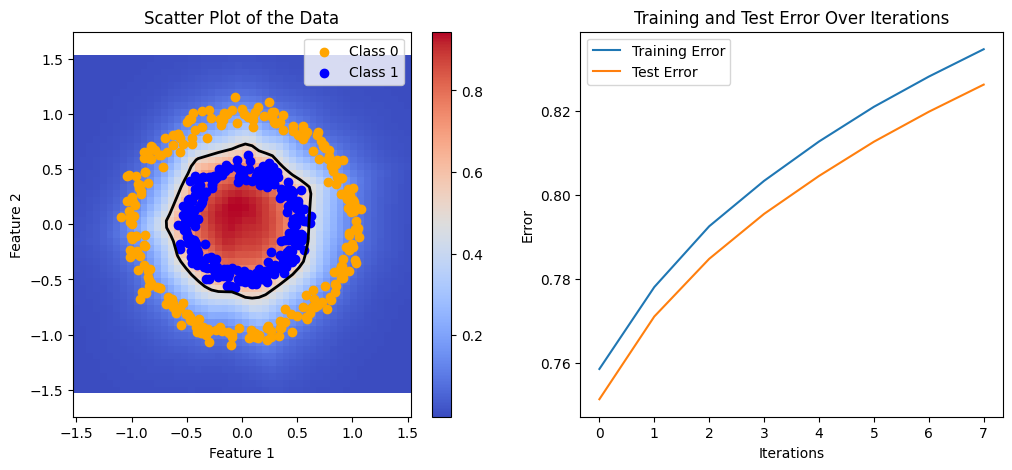

0.8347964968743016 0.8263701886093358


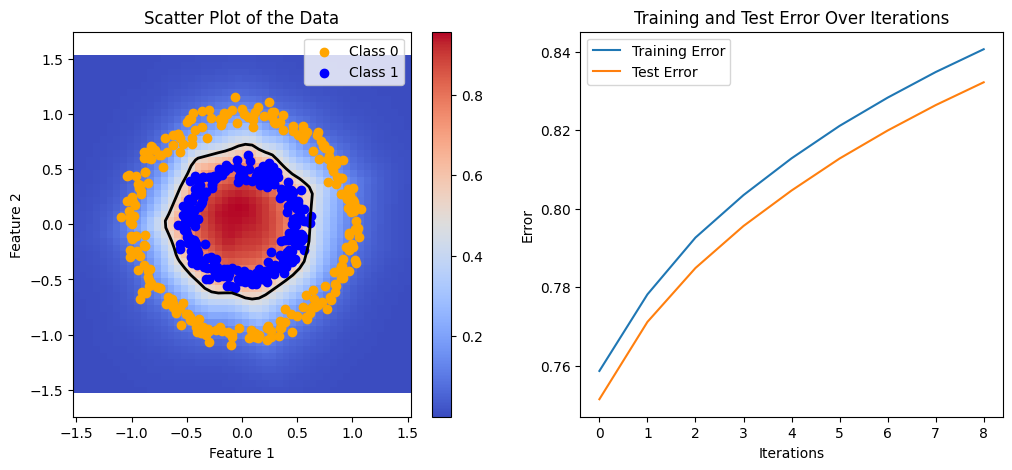

0.8406144837005444 0.8321906760026332


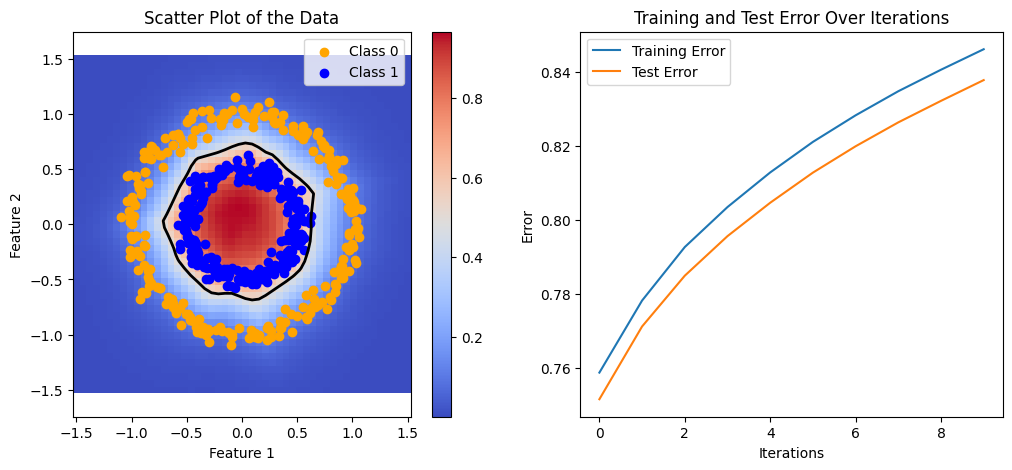

0.8461655964359902 0.8378112994495825


In [29]:
errors_train = []
errors_test = []

neural_struc = create_network_neural(2)

for l in range(20000):
    train(neural_struc, x_train, y_train, loss_f)
    if l % 2000 == 0:
        predictions_train = neural_struc[-1].act_fun[0](x_train @ neural_struc[0].w + neural_struc[0].b)
        error_train = loss_f[0](predictions_train, y_train)
        errors_train.append(error_train)

        # Evaluation on the test set
        predictions_test = neural_struc[-1].act_fun[0](x_test @ neural_struc[0].w + neural_struc[0].b)
        error_test = loss_f[0](predictions_test, y_test)
        errors_test.append(error_test)

        _x0 = np.linspace(-1.5,1.5,50)
        _x1 = np.linspace(-1.5,1.5,50)

        _y = np.zeros((50,50))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _y[i0,i1] = train(neural_struc, np.array([[x0,x1]]), y, loss_f, train=False)[0][0]

        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # First plot: Scatter plot of the data
        c = ax1.pcolormesh(_x0, _x1, _y, cmap='coolwarm')
        ax1.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0, 1], c="orange", label="Class 0")
        ax1.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1, 1], c="blue", label="Class 1")
        ax1.set_title('Scatter Plot of the Data')
        ax1.set_xlabel('Feature 1')
        ax1.set_ylabel('Feature 2')
        ax1.legend()
        ax1.axis("equal")
        ax1.contour(_x0, _x1, _y, levels=[0.5], colors='black', linewidths=2)
        cbar = plt.colorbar(c, ax=ax1)

        # Second plot: Training error plot
        ax2.plot(errors_train, label='Training Error')
        ax2.plot(errors_test, label='Test Error')
        ax2.set_xlabel('Iterations')
        ax2.set_ylabel('Error')
        ax2.legend()
        ax2.set_title('Training and Test Error Over Iterations')
        plt.pause(2)
        plt.close()
        plt.show()
        print(error_train, error_test)

### Metricas

In [30]:
# Eficiencia de la red
        
y_pred_train = (predictions_train > 0.5).astype(int)
y_pred_test = (predictions_test > 0.5).astype(int)

accuracy_train = accuracy(y_train.flatten(), y_pred_train[:,1])
accuracy_test = accuracy(y_test.flatten(), y_pred_test[:,1])

precision_train = precision(y_train.flatten(), y_pred_train[:,0])
recall_train = recall(y_train.flatten(), y_pred_train[:,0])
specificity_train = specificity(y_train.flatten(), y_pred_train[:,0])

precision_test = precision(y_test.flatten(), y_pred_test[:,0])
recall_test = recall(y_test.flatten(), y_pred_test[:,0])
specificity_test = specificity(y_test.flatten(), y_pred_test[:,0])

confusion_train = confusion_matrix(y_train, y_pred_train)
confusion_test = confusion_matrix(y_test, y_pred_test)

print("Exactitud en el conjunto de entrenamiento:", accuracy_train)
print("Exactitud en el conjunto de prueba:", accuracy_test)

print("Precisión en el conjunto de entrenamiento:", precision_train)
print("Recall en el conjunto de entrenamiento:", recall_train)
print("Especificidad en el conjunto de entrenamiento:", specificity_train)

print("Precisión en el conjunto de prueba:", precision_test)
print("Recall en el conjunto de prueba:", recall_test)
print("Especificidad en el conjunto de prueba:", specificity_test)

print("Matriz de confusión en el conjunto de entrenamiento:")
print(confusion_train)

print("Matriz de confusión en el conjunto de prueba:")
print(confusion_test)

Exactitud en el conjunto de entrenamiento: 0.495
Exactitud en el conjunto de prueba: 0.52
Precisión en el conjunto de entrenamiento: 0.532258064516129
Recall en el conjunto de entrenamiento: 0.6666666666666666
Especificidad en el conjunto de entrenamiento: 0.42574257425742573
Precisión en el conjunto de prueba: 0.52
Recall en el conjunto de prueba: 0.5
Especificidad en el conjunto de prueba: 0.5
Matriz de confusión en el conjunto de entrenamiento:
[[5894 7034]
 [5744 6928]]
Matriz de confusión en el conjunto de prueba:
[[1416 1656]
 [1472 1856]]
